## Conveyor Motor Reliability Problem

In this example, we study the **reliability of a conveyor motor** used in an industrial production line.  

<img src="Motor.png" alt="Conveyor Motor" width="500">

**Problem Statement:**  
The conveyor motor has a historical record of **50 failures per 10,000 operating hours**. We want to analyze:

1. The **failure rate** of the motor based on historical data.
2. The **probability that the motor will operate without failure** for **three standard 8-hour shifts**.
3. The **reliability curve** of the motor over time to visualize how its probability of survival decreases with increasing operating hours.

This analysis helps maintenance engineers plan preventive maintenance, estimate downtime risk, and improve overall reliability of the production line.

We model reliability with the exponential law:

$R(t) = e^{-\lambda t}$

where $\lambda$ is the failure rate (per hour).

Historical record: **50 failures per 10,000 hours** →
$\hat{\lambda} = 50/10{,}000 = 0.005 \text{ failures/hour}$

In [1]:
import math

failures = 50
hours_observed = 10_000

lam = failures / hours_observed  # failure rate per hour

t_hours = 3 * 8  # 3 shifts of 8 hours = 24h
R_t = math.exp(-lam * t_hours)
MTTF = 1/lam

print(f"Failure rate λ = {lam:.4f} failures/hour")
print(f"MTTF = {MTTF:.1f} hours")
print(f"Reliability for {t_hours}h (3 shifts): {R_t:.4f}")

Failure rate λ = 0.0050 failures/hour
MTTF = 200.0 hours
Reliability for 24h (3 shifts): 0.8869


## Reliability Curve

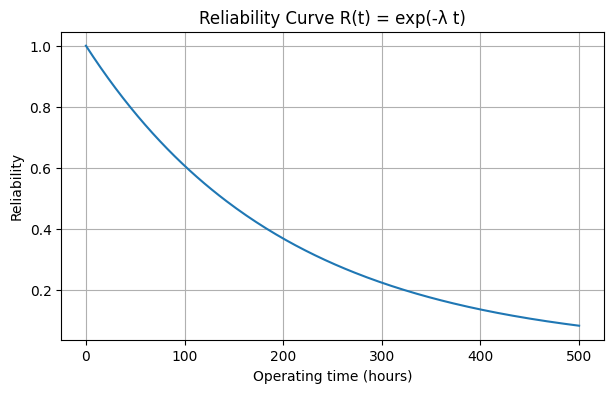

In [2]:
import numpy as np
import matplotlib.pyplot as plt

times = np.linspace(0, 500, 201)
reliability = np.exp(-lam * times)

plt.figure(figsize=(7,4))
plt.plot(times, reliability)
plt.title("Reliability Curve R(t) = exp(-λ t)")
plt.xlabel("Operating time (hours)")
plt.ylabel("Reliability")
plt.grid(True)
plt.show()

## Reliability for multiple shift durations

In [3]:
shift_hours = 8
for shifts in [1,2,3,5]:
    t = shifts*shift_hours
    print(f"R({shifts} shift(s), {t}h) = {math.exp(-lam*t):.4f}")

R(1 shift(s), 8h) = 0.9608
R(2 shift(s), 16h) = 0.9231
R(3 shift(s), 24h) = 0.8869
R(5 shift(s), 40h) = 0.8187


### Reliability Analysis of the Conveyor Motor

The reliability results indicate how likely the conveyor motor is to operate without failure over consecutive standard shifts:

- **1 shift (8 hours):** The motor has a reliability of **0.9608**, meaning there is a 96.08% chance it will complete a single shift without failing.  

- **2 shifts (16 hours):** Reliability decreases to **0.9231**, showing that as the motor continues to operate, the probability of failure accumulates.  

- **3 shifts (24 hours):** Reliability further drops to **0.8869**, implying that over a typical full workday of three shifts, the motor has approximately an 88.7% chance of running without interruption.  

- **5 shifts (40 hours):** Reliability falls to **0.8187**, highlighting that the risk of failure becomes more significant over longer operating periods.

**Key Takeaways:**

1. **Reliability is time-dependent:** Even though the motor and operating conditions remain the same, the likelihood of uninterrupted operation decreases as the total running time increases.  

2. **Failure probability grows over time:** For instance, after three shifts, there is around an 11% probability that the motor will fail, emphasizing the importance of monitoring and preventive maintenance.  

3. **Planning maintenance interventions:** These reliability estimates can guide maintenance schedules to prevent unplanned downtime and ensure smooth operations.

4. **Visual interpretation:** Plotting reliability over time produces a declining curve, which visually demonstrates the increasing risk of failure as operating hours accumulate.  

By understanding these reliability dynamics, maintenance engineers can better allocate resources, plan inspections, and optimize the operational availability of critical equipment like the conveyor motor.